# 3.2.1 Definición y simulación

## Definición

**Gaussiana multivariada:** $\;\boldsymbol{x}\sim\mathcal{N}(\boldsymbol{\mu},\mathbf{\Sigma}),\,$ con $\,\boldsymbol{x}\in\mathbb{R}^D,\,$ **media** $\,\boldsymbol{\mu}=\mathbb{E}[\boldsymbol{x}]\in\mathbb{R}^D\,$ y **matriz de covarianzas** $\,\mathbf{\Sigma}=\operatorname{Cov}[\boldsymbol{x}]\in\mathbb{R}^{D\times D}$
$$p(\boldsymbol{x}\mid\boldsymbol{\mu},\mathbf{\Sigma})%
=\frac{1}{(2\pi)^{D/2}\lvert\mathbf{\Sigma}\rvert^{1/2}}%
\exp\left[-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^t\mathbf{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right]$$


**Gaussiana bivariada:** $\;\boldsymbol{x}\sim\mathcal{N}(\boldsymbol{\mu},\mathbf{\Sigma}),\,$ con $\,\boldsymbol{x},\boldsymbol{\mu}\in\mathbb{R}^2\,$ y $\,\mathbf{\Sigma}=\begin{pmatrix}\sigma_1^2 & \sigma_{12}^2\\\sigma_{21}^2 & \sigma_2^2\end{pmatrix}=\begin{pmatrix}\sigma_1^2 & \rho\sigma_1\sigma_2\\\rho\sigma_1\sigma_2 & \sigma_2^2\end{pmatrix}\,$ con $\displaystyle\,\rho=\frac{\sigma_{12}^2}{\sigma_1\sigma_2}$
$$p(x_1,x_2)=\frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho^2}}\exp\left(-\frac{1}{2(1-\rho^2)}\left[\frac{(x_1-\mu_1)^2}{\sigma_1^2}+\frac{(x_2-\mu_2)^2}{\sigma_2^2}-2\rho\,\frac{(x_1-\mu_1)}{\sigma_1}\frac{(x_2-\mu_2)}{\sigma_2}\right]\right)$$


**Tipos de Gaussianas según estructura de $\mathbf{\Sigma}$:**
* **Esférica:** $\;\mathbf{\Sigma}=\sigma^2\mathbf{I},\,$ con un único parámetro y curvas de iso-densidad hiper-esféricas
* **Diagonal:** $\;\mathbf{\Sigma}=\operatorname{diag}(\sigma_1^2,\dotsc,\sigma_D^2),\,$ con $\,D\,$ parámetros y curvas de iso-densidad hiper-elipsoidales de semiejes paralelos a la base
* **General:** $\;\mathbf{\Sigma}\,$ no diagonal, con $\,D(D+1)/2\,$ parámetros y curvas de iso-densidad hiper-elipsoidales de semiejes oblicuos a la base

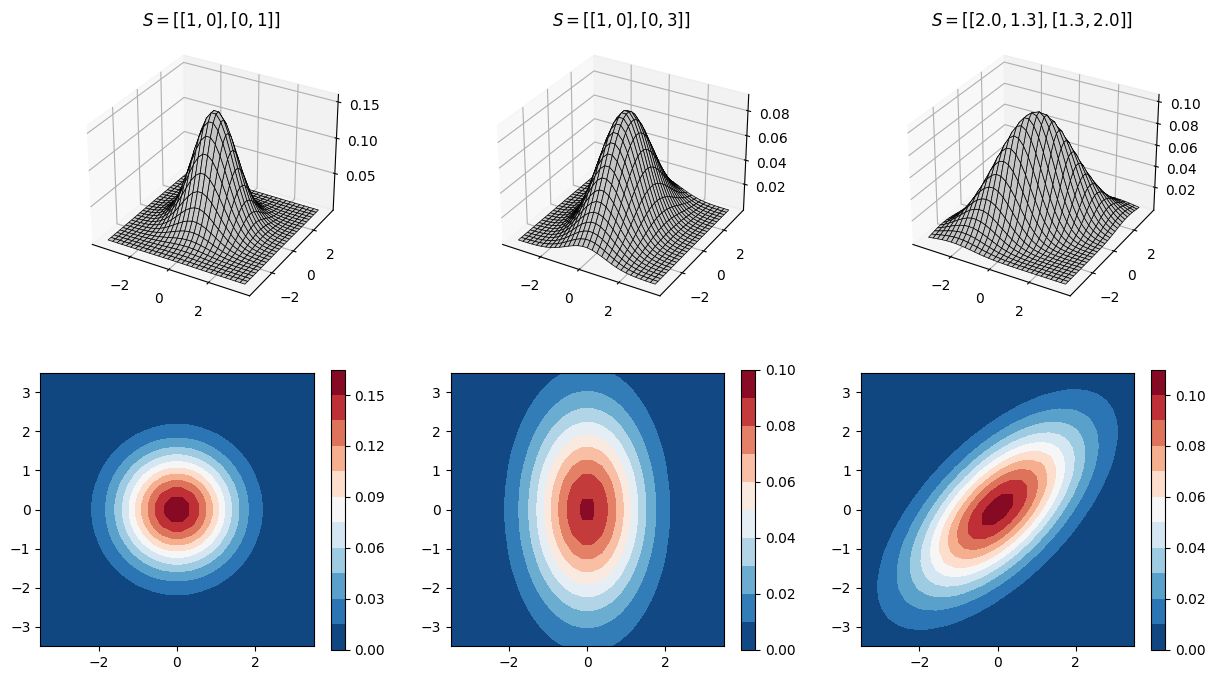

In [1]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import multivariate_normal
R = np.linspace(-3.5, 3.5, 30); x, y = np.meshgrid(R, R); me, Se = [0, 0], [[1, 0], [0, 1]]
md, Sd = [0, 0], [[1, 0], [0, 3]]; mg, Sg = [0, 0], [[2., 1.3], [1.3, 2.]]
fig = plt.figure(figsize=(15, 8)); fig.tight_layout()
for i, (m, S) in enumerate(zip((me, md, mg), (Se, Sd, Sg)), start=1):
    z = multivariate_normal(m, S).pdf(np.dstack((x, y)))
    ax = fig.add_subplot(2, 3, i, projection='3d'); ax.set_title(f'$S={S}$'.format(S))
    ax.plot_surface(x, y, z, color='white', edgecolor="black", lw=.5)
    ax = fig.add_subplot(2, 3, i+3, aspect='equal')
    cp = ax.contourf(x, y, z, 10, cmap='RdBu_r'); plt.colorbar(cp, ax=ax);

## Simulación

**Gaussiana general como afinidad de la estándar:** $\quad\boldsymbol{x}\sim\mathcal{N}_D(\boldsymbol{0}.\mathbf{I}),\quad\boldsymbol{y}=\mathbf{W}\boldsymbol{x}+\boldsymbol{\mu}\quad\to\quad\boldsymbol{x}=\mathbf{W}^{-1}(\boldsymbol{y}-\boldsymbol{\mu})$
$$\begin{align*}
p_{\boldsymbol{y}}(\boldsymbol{y})%
&=p_{\boldsymbol{x}}(\mathbf{W}^{-1}(\boldsymbol{y}-\boldsymbol{\mu}))\,\lvert\det(\mathbf{W}^{-1})\rvert\\
&=\frac{1}{(2\pi)^{D/2}\lvert\det(\mathbf{W})\rvert}%
\exp\left[-\frac{1}{2}(\boldsymbol{y}-\boldsymbol{\mu})^t\mathbf{W}^{-t}\mathbf{\mathbf{W}}^{-1}(\boldsymbol{y}-\boldsymbol{\mu})\right]\\
&=\frac{1}{(2\pi)^{D/2}\lvert\mathbf{\Sigma}\rvert^{1/2}}%
\exp\left[-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^t\mathbf{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right]%
\quad\text{con}\quad \mathbf{\Sigma}=\mathbf{W}\mathbf{W}^t
\end{align*}$$

**Bola Gaussiana estándar de masa $p$:** $\quad P(\lVert\boldsymbol{x}\rVert_2^2\leq r)=P(\chi_D^2\leq r)=p$

**Bola Gaussiana estándar 2d de masa $p$:** $\quad r=\sqrt{-2\log(1-p)}\qquad p=1-e^{-r^2/2}$

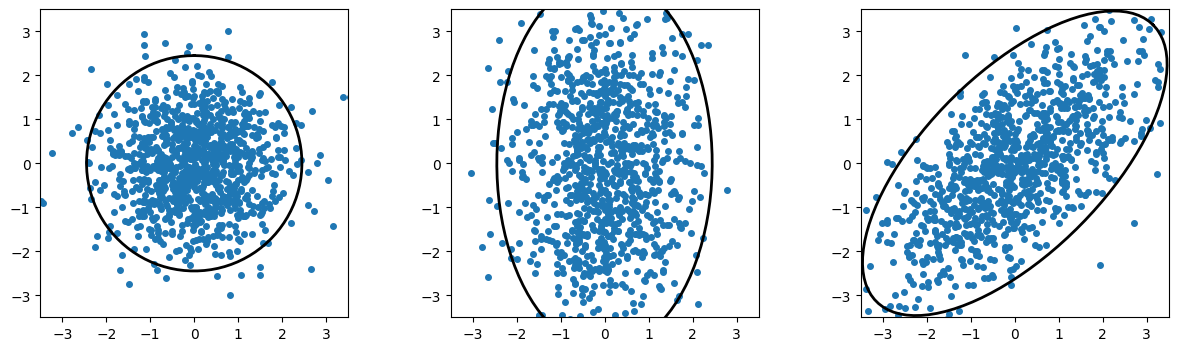

In [2]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import multivariate_normal
me, Se = [0, 0], [[1, 0], [0, 1]]; md, Sd = [0, 0], [[1, 0], [0, 3]]; mg, Sg = [0, 0], [[2., 1.3], [1.3, 2.]]
p = .95; r = np.sqrt(-2.0*np.log(1.0-p)); t = np.linspace(0, 2.0*np.pi, 100); C = np.array([np.cos(t), np.sin(t)]) * r
fig = plt.figure(figsize=(15, 4)); fig.tight_layout()
for i, (m, S) in enumerate(zip((me, md, mg), (Se, Sd, Sg)), start=1):
    ax = fig.add_subplot(1, 3, i, aspect='equal'); ax.set_xlim(-3.5, 3.5); ax.set_ylim(-3.5, 3.5)
    X = multivariate_normal(m, S).rvs(1000); ax.scatter(*X.T, s=16)
    La, U = np.linalg.eigh(S); k = La.argsort()[::-1]; La = La[k]; U = U[:,k]; W = U @ np.diag(np.sqrt(La))
    Y = W @ C; ax.plot(*Y, lw=2, color='black')